# Lab 6 - Sentiment and Sentence Parsing

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from nltk import sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from afinn import Afinn

/Users/reedmershon/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
filePath = "Paul_Revere_s_Ride.txt"

fopen = open(filePath)
lines_list = tokenize.sent_tokenize(fopen.read())
fopen.close()

## Sentiment

In [3]:
afinn = Afinn()

In [4]:
sent_afinn = []
for line in lines_list:
    sent_afinn.append(afinn.score(" ".join(sentiment.util.mark_negation(line.split(), double_neg_flip=True))))
len(sent_afinn)

27

-0.9259259259259259

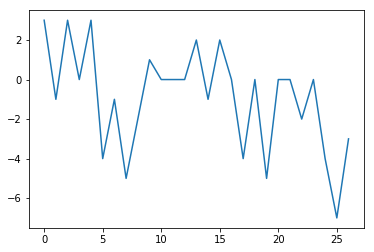

In [5]:
plt.plot(range(len(sent_afinn)), sent_afinn)
sum(sent_afinn) / len(sent_afinn)



In [11]:
for i in range(len(sent_afinn)):
    if sent_afinn[i] < -5 or sent_afinn[i] > 5:
        print(sent_afinn[i], lines_list[i])

-7.0 So through the night rode Paul Revere;
And so through the night went his cry of alarm
To every Middlesex village and farm,-A cry of defiance, and not of fear,
A voice in the darkness, a knock at the door,
And a word that shall echo forevermore!


In [12]:
sid = SentimentIntensityAnalyzer()
tc = 0
for sentence in lines_list:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        
        if k =='compound':
            tc += ss[k]
    tc = tc/len(lines_list)
    print()

Listen, my children, and you shall hear
Of the midnight ride of Paul Revere,
On the eighteenth of April, in Seventy-Five:
Hardly a man is now alive
Who remembers that famous day and year.
compound: 0.3818, neg: 0.0, neu: 0.925, pos: 0.075, 
He said to his friend, "If the British march
By land or sea from the town to-night,
Hang a lantern aloft in the belfry-arch
Of the North-Church-tower, as a signal-light,-One if by land, and two if by sea;
And I on the opposite shore will be,
Ready to ride and spread the alarm
Through every Middlesex village and farm,
For the country-folk to be up and to arm."
compound: 0.5106, neg: 0.034, neu: 0.884, pos: 0.081, 
Then he said "Good night!"
compound: 0.4926, neg: 0.0, neu: 0.556, pos: 0.444, 
and with muffled oar
Silently rowed to the Charlestown shore,
Just as the moon rose over the bay,
Where swinging wide at her moorings lay
The Somerset, British man-of-war:
A phantom ship, with each mast and spar
Across the moon, like a prison-bar,
And a huge bla

In [8]:
print(tc)

-0.022322967061922525


From AFINN, there is a score of -.9259 compounded over each of the sentences of my poem. This score has no set range (if im reading the documentation correctly) and this means that having a score this close to 0 is a fairly neutral poem. When looking at extremes of the scores, from -5 to 5 and if anything is outside of this range it will return and print in one of the above boxes. There is only one of the 27 sentences that is above this range. I think that 'fear' has a lot to do with this score for this sentence. From the VADER sentiment analysis, we get a compound of -0.022. This means that the overall sentiment of this poem is fairly neutral. Again the sentence seen in the AFINN with the highest negative score is the highest negative score in VADER. 

Other words like dead and dread, or trembeling may contribute to some sentences being considered negative. However there aren't enough to completely deem this poem as negative. Even though there are many negative words in it. 

## Tagging

In [10]:
import nltk
from nltk.corpus import brown

In [14]:
brown_tagged_sents = brown.tagged_sents(categories='news')

size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

In [15]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

In [16]:
t2.evaluate(test_sents)

0.8452108043456593

In [18]:
sents = ["Unfortunately, they haven't been paying on time recently .",
         "I'd like to thank you all for attending today's meeting .",
         "Art lovers can visit the Metropolitan Museum of Art on the Upper Eastside next to Central Park .",
         "However , there are a number of places and events that really must be seen and enjoyed if you are in London.",
         "To experience the famous eccentric side of British life, make sure to visit Speakers' Corner in Hyde Park",
         "Not only are London parks beautiful, but they may be one of the only places you can meet the British .", 
         "They were able to choose from a limited number of programs on three or four channels .", 
         "Another choice might be playing a video game on the computer or TV screen .",
         "Gone are the days when a worker might sit around the staff room discussing last night's entertainment .",
         "I often feel we've forgotten to communicate with our surroundings ."]



In [24]:

for s in sents:
    print(t2.tag(s.split(" ")))

[('Unfortunately,', 'NN'), ('they', 'PPSS'), ("haven't", 'NN'), ('been', 'BEN'), ('paying', 'VBG'), ('on', 'IN'), ('time', 'NN'), ('recently', 'RB'), ('.', '.')]
[("I'd", 'PPSS+HVD'), ('like', 'CS'), ('to', 'TO'), ('thank', 'VB'), ('you', 'PPO'), ('all', 'ABN'), ('for', 'IN'), ('attending', 'VBG'), ("today's", 'NR$'), ('meeting.', 'NN')]
[('Art', 'NP'), ('lovers', 'NN'), ('can', 'MD'), ('visit', 'VB'), ('the', 'AT'), ('Metropolitan', 'JJ-TL'), ('Museum', 'NN-TL'), ('of', 'IN-TL'), ('Art', 'NP'), ('on', 'IN'), ('the', 'AT'), ('Upper', 'NN'), ('Eastside', 'NN'), ('next', 'AP'), ('to', 'TO'), ('Central', 'JJ-TL'), ('Park.', 'NN')]
[('However', 'WRB'), (',', ','), ('there', 'EX'), ('are', 'BER'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('places', 'NNS'), ('and', 'CC'), ('events', 'NNS'), ('that', 'WPS'), ('really', 'RB'), ('must', 'MD'), ('be', 'BE'), ('seen', 'VBN'), ('and', 'CC'), ('enjoyed', 'VBN'), ('if', 'CS'), ('you', 'PPSS'), ('are', 'BER'), ('in', 'IN'), ('London.', 'NN')]
[('

* I believe that the first sentence is tagged correctly in respect to the bold word 'recently'. This word is tagged as an adverb to paying, which makes sense to me. 
* The next sentence's bold word was tagged as a preposition or conjunction. This makes sense as 'for' is the conjunction to attending the meeting and thanking everyone. 
* Metropolitan is tagged as a ordinal. This makes sense as metropolitan can describe an area. Museum is tagged as a noun, which it is. 'of' is tagged as a conjunction to the noun proper 'Art'. All of these are connected to each other, and don't overlap
* 'However' is tagged as a Wh-adverb. And in the description for this has 'however' as an example.
* Eccentric is being described, and is therefor properly tagged as 'noun'
* 'but' is tagged as a conjunction. This makes sense as that is typically how it is used. And certainly how it is used in this case
* channels was tagged as a noun, common and plural. They could only choose a few programs on a three or four channels
* 'might be' is tagged as a modal auxiliary and a BE. might is part of this tag. 
* 'around' is tagged as an adverb. It accompanies 'sit'. 
* 'often' is also tagged as an adverb. it accompanies 'feel'.

In [25]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Parsing

In [2]:
import sys

import googleapiclient.discovery


def get_native_encoding_type():
    """Returns the encoding type that matches Python's native strings."""
    if sys.maxunicode == 65535:
        return 'UTF16'
    else:
        return 'UTF32'


def analyze_entities(text, encoding='UTF32'):
    body = {
        'document': {
            'type': 'PLAIN_TEXT',
            'content': text,
        },
        'encoding_type': encoding,
    }

    service = googleapiclient.discovery.build('language', 'v1')

    request = service.documents().analyzeEntities(body=body)
    response = request.execute()

    return response


def analyze_sentiment(text, encoding='UTF32'):
    body = {
        'document': {
            'type': 'PLAIN_TEXT',
            'content': text,
        },
        'encoding_type': encoding
    }

    service = googleapiclient.discovery.build('language', 'v1')

    request = service.documents().analyzeSentiment(body=body)
    response = request.execute()

    return response


def analyze_syntax(text, encoding='UTF32'):
    body = {
        'document': {
            'type': 'PLAIN_TEXT',
            'content': text,
        },
        'encoding_type': encoding
    }

    service = googleapiclient.discovery.build('language', 'v1')

    request = service.documents().analyzeSyntax(body=body)
    response = request.execute()

    return response

### Google - Parsing

In [3]:
result = analyze_syntax("""I shot an elephant in my pajamas.""", get_native_encoding_type())

In [5]:
ewSent = "The Francmason weighed anchor, swung about, and steamed into the ochre hills, through the straits and out into the open sea while Corker recounted the heroic legends of Fleet Street; he told of the classic scoops and hoaxes; of the confessions wrung from hysterical suspects; of the innuendo and intricate misrepresentations, the luscious, detailed inventions that composed contemporary history; of the positive, daring lies that got a chap a rise of screw; how Wenlock Jakes, highest paid journalist of the United States, scooped the world with an eye-witness story of the sinking of the Lusitania four hours before she was hit; how [Sir Jocelyn] Hitchcock, the English Jakes, straddling over his desk in London, had chronicled day by day the horrors of the Messina earthquake; how Corker himself, not three months back, had had the good fortune to encounter a knight’s widow trapped by the foot between lift and landing."

ltSent = "It is true that Alexei Alexandrovich vaguely sensed the levity and erroneousness of this notion of his faith, and he knew that when, without any thought that his forgiveness was the effect of a higher power, he had given himself to his spontaneous feeling, he had experienced greater happiness than when he thought every minute, as he did now, that Christ lived in his soul, and that by signing papers he was fulfilling His will, but it was necessary for him to think that way, it was so necessary for him in his humiliation to possess at least an invented loftiness from which he, despised by everyone, could despise others, that he clung to his imaginary salvation as if it were salvation indeed."


Evelyn Waugh, “Scoop.” 150 words.

“The Francmason weighed anchor, swung about, and steamed into the ochre hills, through the straits and out into the open sea while Corker recounted the heroic legends of Fleet Street; he told of the classic scoops and hoaxes; of the confessions wrung from hysterical suspects; of the innuendo and intricate misrepresentations, the luscious, detailed inventions that composed contemporary history; of the positive, daring lies that got a chap a rise of screw; how Wenlock Jakes, highest paid journalist of the United States, scooped the world with an eye-witness story of the sinking of the Lusitania four hours before she was hit; how [Sir Jocelyn] Hitchcock, the English Jakes, straddling over his desk in London, had chronicled day by day the horrors of the Messina earthquake; how Corker himself, not three months back, had had the good fortune to encounter a knight’s widow trapped by the foot between lift and landing.”

Leo Tolstoy, “Anna Karenina.” 123 Words.

“It is true that Alexei Alexandrovich vaguely sensed the levity and erroneousness of this notion of his faith, and he knew that when, without any thought that his forgiveness was the effect of a higher power, he had given himself to his spontaneous feeling, he had experienced greater happiness than when he thought every minute, as he did now, that Christ lived in his soul, and that by signing papers he was fulfilling His will, but it was necessary for him to think that way, it was so necessary for him in his humiliation to possess at least an invented loftiness from which he, despised by everyone, could despise others, that he clung to his imaginary salvation as if it were salvation indeed.”

In [6]:
ewResult = analyze_syntax(ewSent, get_native_encoding_type())

In [7]:
ltResult = analyze_syntax(ltSent, get_native_encoding_type())

In [9]:
from graphviz import Digraph

In [12]:
ewDig = Digraph(format='png')
for i in range(len(ewResult["tokens"])):
    w = ewResult["tokens"][i]
    print(w["text"]["content"])
    if (w["partOfSpeech"]["tag"] != "PUNCT"):
        s = "egg"
        if w["partOfSpeech"]["tag"] == "NOUN":
            s = "rectangle"
        ewDig.node(str(i), w["text"]["content"] + "\n" + w["partOfSpeech"]["tag"], shape = s)
        ewDig.edge(str(w["dependencyEdge"]["headTokenIndex"]), str(i), label=w["dependencyEdge"]["label"])

The
Francmason
weighed
anchor
,
swung
about
,
and
steamed
into
the
ochre
hills
,
through
the
straits
and
out
into
the
open
sea
while
Corker
recounted
the
heroic
legends
of
Fleet
Street
;
he
told
of
the
classic
scoops
and
hoaxes
;
of
the
confessions
wrung
from
hysterical
suspects
;
of
the
innuendo
and
intricate
misrepresentations
,
the
luscious
,
detailed
inventions
that
composed
contemporary
history
;
of
the
positive
,
daring
lies
that
got
a
chap
a
rise
of
screw
;
how
Wenlock
Jakes
,
highest
paid
journalist
of
the
United
States
,
scooped
the
world
with
an
eye
-
witness
story
of
the
sinking
of
the
Lusitania
four
hours
before
she
was
hit
;
how
[
Sir
Jocelyn
]
Hitchcock
,
the
English
Jakes
,
straddling
over
his
desk
in
London
,
had
chronicled
day
by
day
the
horrors
of
the
Messina
earthquake
;
how
Corker
himself
,
not
three
months
back
,
had
had
the
good
fortune
to
encounter
a
knight
’s
widow
trapped
by
the
foot
between
lift
and
landing
.


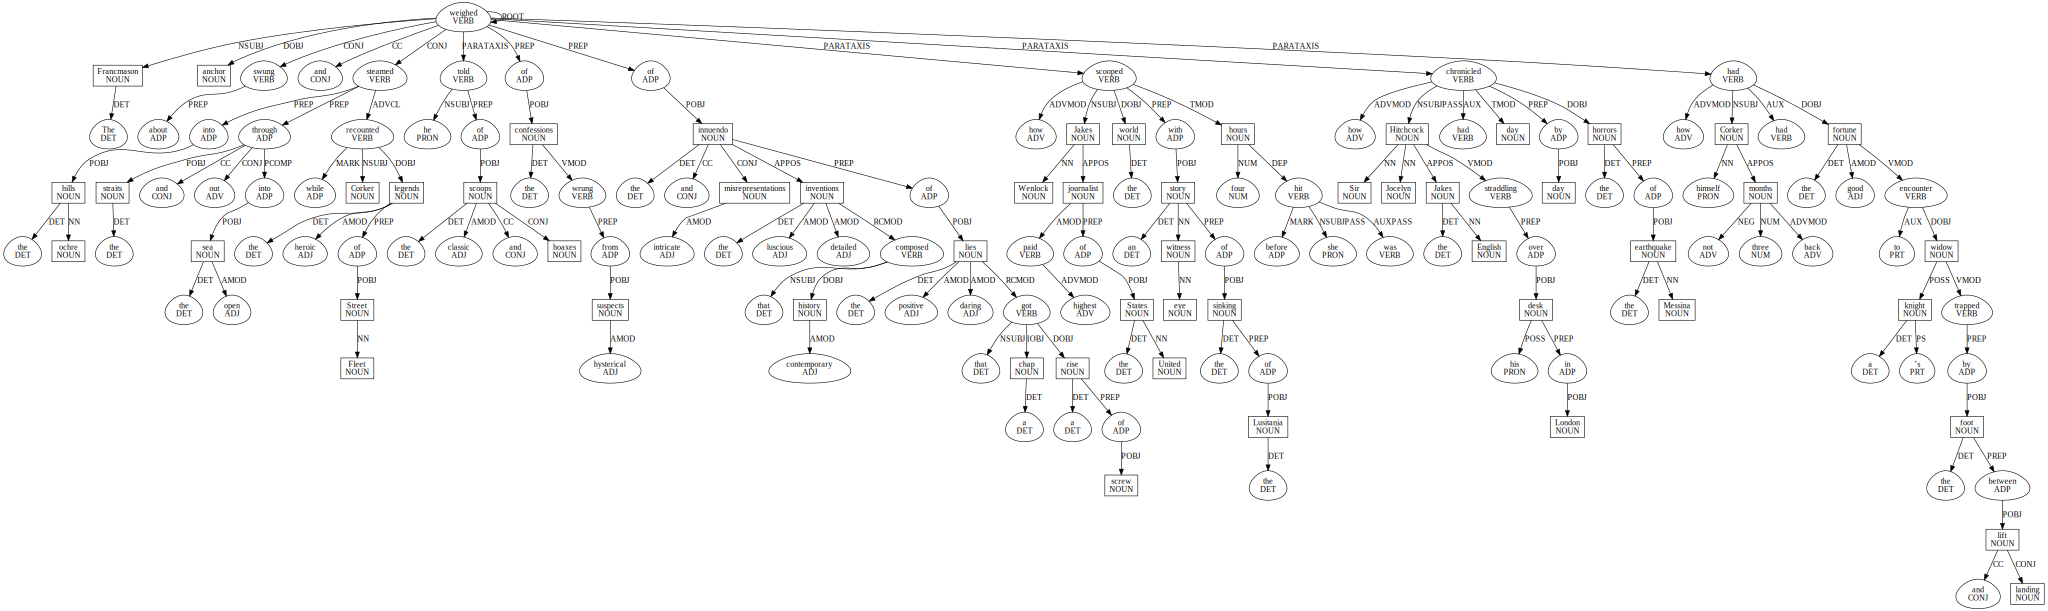

In [13]:
ewDig

In [14]:
ltDig = Digraph(format='png')
for i in range(len(ltResult["tokens"])):
    w = ltResult["tokens"][i]
    print(w["text"]["content"])
    if (w["partOfSpeech"]["tag"] != "PUNCT"):
        s = "egg"
        if w["partOfSpeech"]["tag"] == "NOUN":
            s = "rectangle"
        ltDig.node(str(i), w["text"]["content"] + "\n" + w["partOfSpeech"]["tag"], shape = s)
        ltDig.edge(str(w["dependencyEdge"]["headTokenIndex"]), str(i), label=w["dependencyEdge"]["label"])

It
is
true
that
Alexei
Alexandrovich
vaguely
sensed
the
levity
and
erroneousness
of
this
notion
of
his
faith
,
and
he
knew
that
when
,
without
any
thought
that
his
forgiveness
was
the
effect
of
a
higher
power
,
he
had
given
himself
to
his
spontaneous
feeling
,
he
had
experienced
greater
happiness
than
when
he
thought
every
minute
,
as
he
did
now
,
that
Christ
lived
in
his
soul
,
and
that
by
signing
papers
he
was
fulfilling
His
will
,
but
it
was
necessary
for
him
to
think
that
way
,
it
was
so
necessary
for
him
in
his
humiliation
to
possess
at
least
an
invented
loftiness
from
which
he
,
despised
by
everyone
,
could
despise
others
,
that
he
clung
to
his
imaginary
salvation
as
if
it
were
salvation
indeed
.


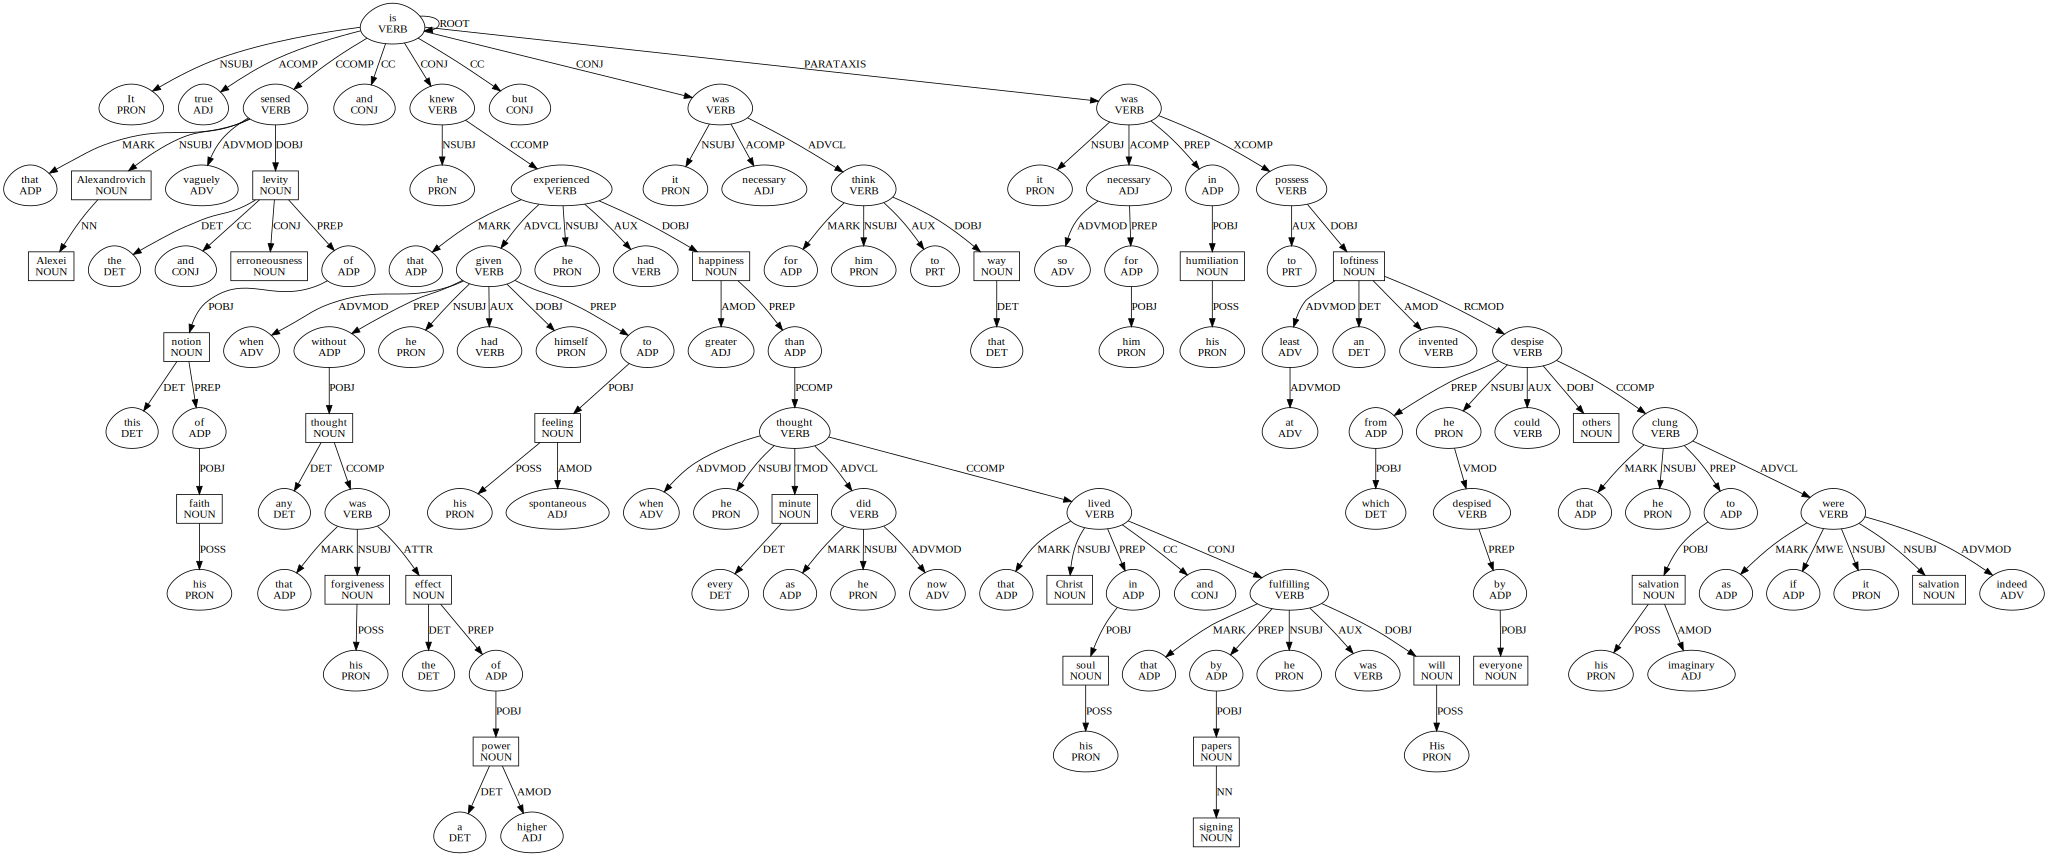

In [15]:
ltDig

### Stanford and Google - Parsing

In [16]:
sSent = "Gasper Hicks stared down at the dead teenager at the foot of his door and realized he knew him; knew him as a boy, from the days when Gasper taught Sunday school, knew him as a blonde, dirt-faced kid desperate for attention, knew him as one of the dozen anxious children they bussed from the trailer park."
sResult = analyze_syntax(sSent, get_native_encoding_type())

In [17]:
sDig = Digraph(format='png')
for i in range(len(sResult["tokens"])):
    w = sResult["tokens"][i]
    print(w["text"]["content"])
    if (w["partOfSpeech"]["tag"] != "PUNCT"):
        s = "egg"
        if w["partOfSpeech"]["tag"] == "NOUN":
            s = "rectangle"
        sDig.node(str(i), w["text"]["content"] + "\n" + w["partOfSpeech"]["tag"], shape = s)
        sDig.edge(str(w["dependencyEdge"]["headTokenIndex"]), str(i), label=w["dependencyEdge"]["label"])

Gasper
Hicks
stared
down
at
the
dead
teenager
at
the
foot
of
his
door
and
realized
he
knew
him
;
knew
him
as
a
boy
,
from
the
days
when
Gasper
taught
Sunday
school
,
knew
him
as
a
blonde
,
dirt
-
faced
kid
desperate
for
attention
,
knew
him
as
one
of
the
dozen
anxious
children
they
bussed
from
the
trailer
park
.


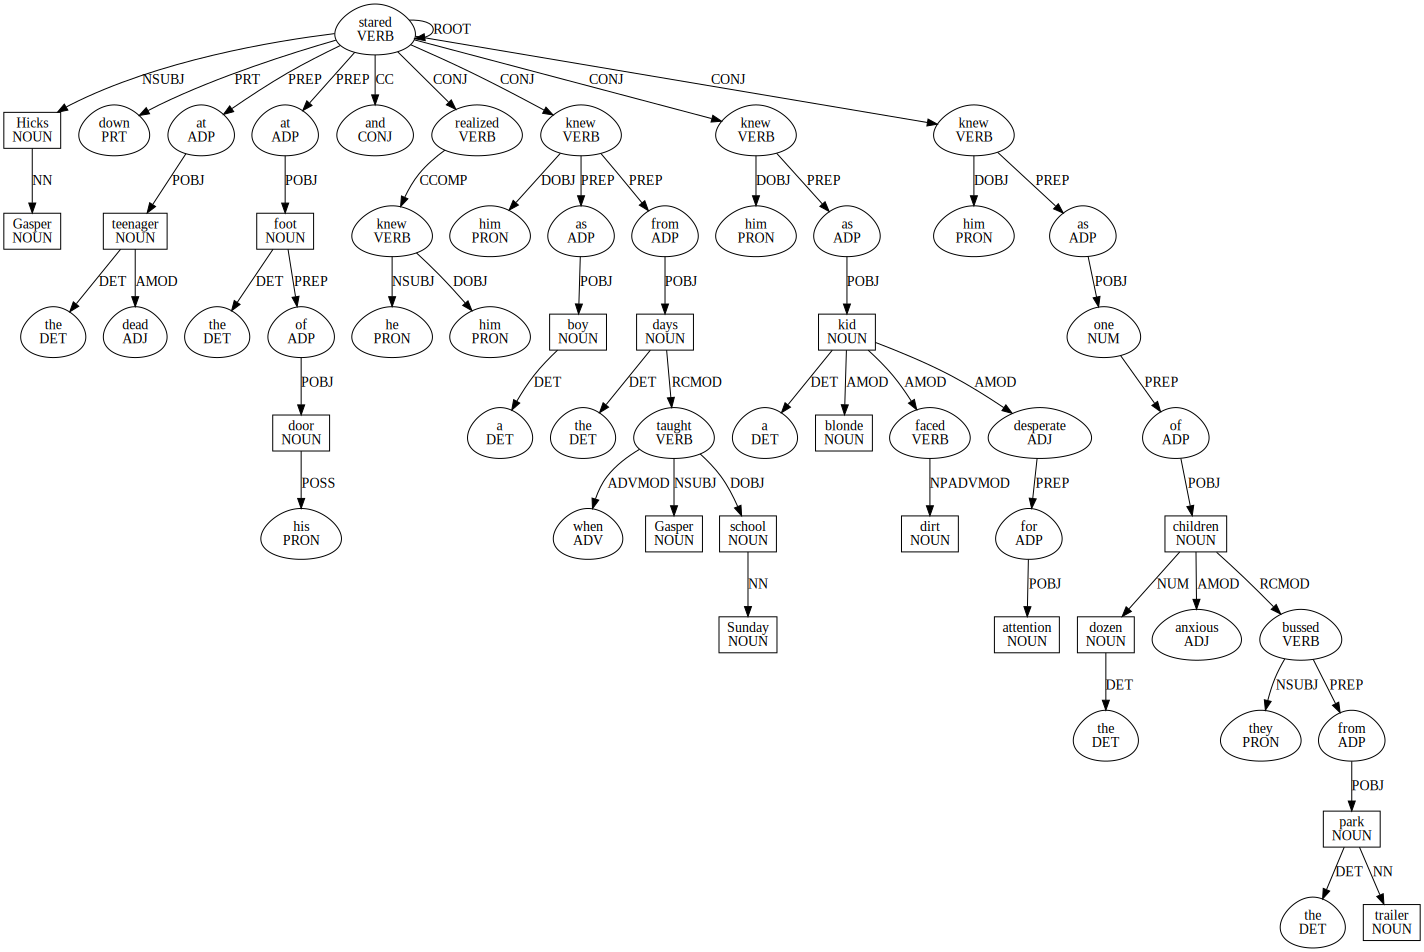

In [18]:
sDig

So both Google and Stanford parsers tag Gasper Hicks as a Noun, and also as a subject. But stared is not the root of the Stanford parser, instead stared is involved with Gasper Hicks, and a few of the conjections and particle of speech. But it does not have the broad range of words connected to it as the Google parser does. Stanford seems to tag 'realized' as the main verb as it has a broad range of items in its branch of the tree. This differs greatly from google, as Google only has 3 nodes off of 'realized'. Same goes for 'from' in stanford. It is associated with the part of the text with 'blonde dirt-faced kid' in it. However, Google has separated both of these into different branches in the graph. 

I think that they are significant, the way that both parsers are tagging and identifying how words are associated with one another is significantly different. The way that Stanford separated the sentence seems to be far more of a trickle down system of analysis. Google's API seems to be able to connect parts of the sentence at the end with parts at the beginning. Stanford doesn't seem to operate as well with these long sentences. 